In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!ls

marketing_campaign.csv	sample_data


In [3]:
df = pd.read_csv('marketing_campaign.csv', sep='\t', index_col=0)
df.shape

(2240, 28)

In [4]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

In [6]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df[df['Income'].isnull()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0


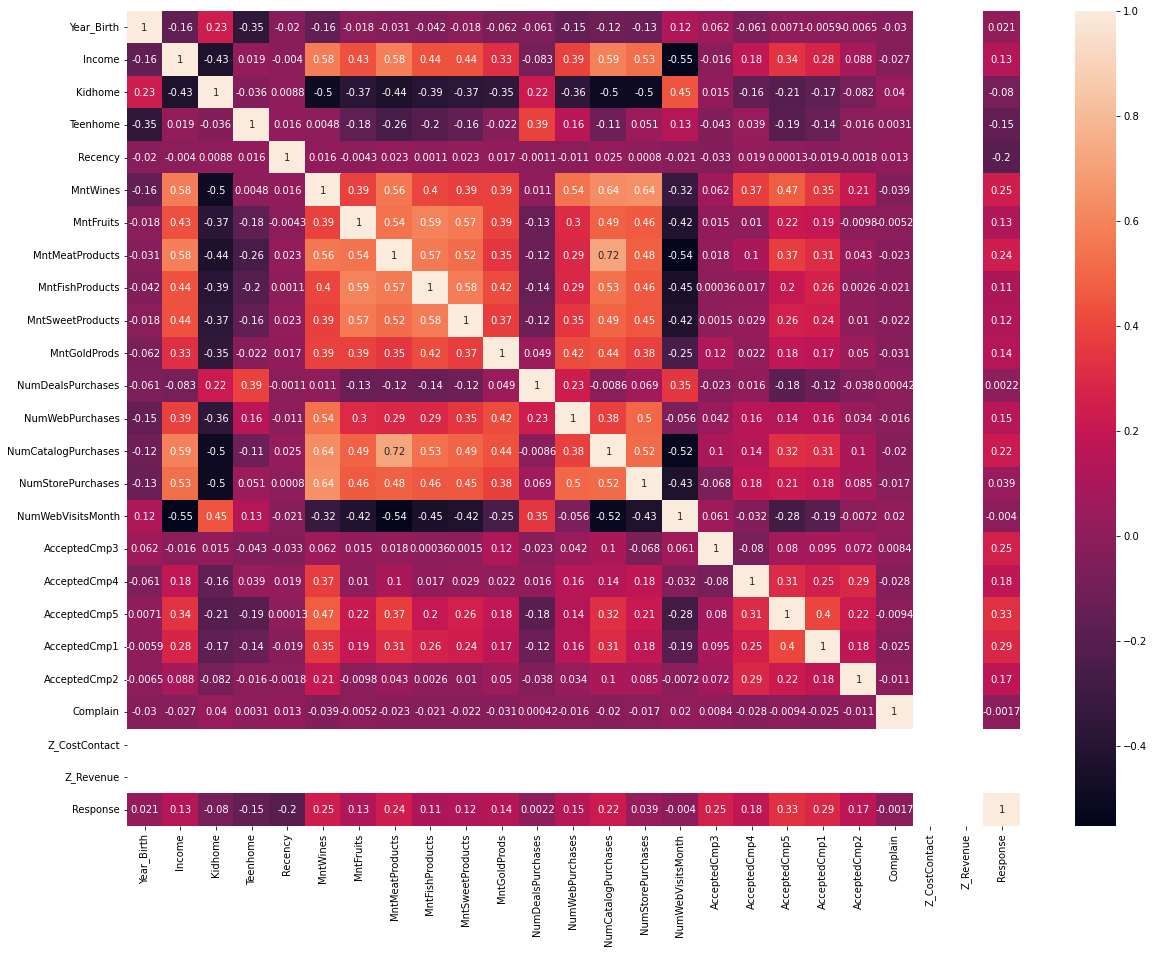

In [8]:
corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)

In [9]:
df['NumCatalogPurchases'].describe()

count    2240.000000
mean        2.662054
std         2.923101
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64

In [10]:
df[df['Income'].isnull()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0


In [11]:
case_4 = round(df[df['NumCatalogPurchases'] == 0]['Income'].mean(), 1)
case_3 = round(df[(df['NumCatalogPurchases'] > 0) & (df['NumCatalogPurchases'] <= 2)]['Income'].mean(), 1)
case_2 = round(df[(df['NumCatalogPurchases'] > 2) & (df['NumCatalogPurchases'] <= 4)]['Income'].mean(), 1)
case_1 = round(df[df['NumCatalogPurchases'] > 4]['Income'].mean(), 1)

In [12]:
print(case_1, case_2, case_3, case_4)

73663.1 65999.8 45992.9 32898.6


In [13]:
df.loc[(df['Income'].isnull()) & (df['NumCatalogPurchases'] == 0), 'Income'] = case_4
df.loc[(df['Income'].isnull()) & ((df['NumCatalogPurchases'] > 0) & (df['NumCatalogPurchases'] <= 2)), 'Income'] = case_3
df.loc[(df['Income'].isnull()) & ((df['NumCatalogPurchases'] > 2) & (df['NumCatalogPurchases'] <= 4)), 'Income'] = case_2
df.loc[(df['Income'].isnull()) & (df['NumCatalogPurchases'] > 4), 'Income'] = case_1

In [14]:
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [15]:
df['Age'] = 2021 - df['Year_Birth']

In [16]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40


In [17]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [18]:
df['Engagement'] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['Response']

In [19]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Engagement
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,0


In [20]:
df['Expenditure'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [21]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Engagement,Expenditure
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,1,1617
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,0,27
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,0,776
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,0,53
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,0,422


In [22]:
df_cluster = df[['Age', 'Income', 'Expenditure', 'Engagement']].copy()
df_cluster

,Age,Income,Expenditure,Engagement
ID,,,,
5524,64,58138.0,1617,1
2174,67,46344.0,27,0
4141,56,71613.0,776,0
6182,37,26646.0,53,0
5324,40,58293.0,422,0
...,...,...,...,...
10870,54,61223.0,1341,0
4001,75,64014.0,444,1
7270,40,56981.0,1241,1


In [23]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          2240 non-null   int64  
 1   Income       2240 non-null   float64
 2   Expenditure  2240 non-null   int64  
 3   Engagement   2240 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 87.5 KB


In [24]:
df_cluster['Income'] = df_cluster['Income'].astype(int)

In [25]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          2240 non-null   int64
 1   Income       2240 non-null   int64
 2   Expenditure  2240 non-null   int64
 3   Engagement   2240 non-null   int64
dtypes: int64(4)
memory usage: 87.5 KB


In [26]:
df_cluster.head()

,Age,Income,Expenditure,Engagement
ID,,,,
5524,64,58138,1617,1
2174,67,46344,27,0
4141,56,71613,776,0
6182,37,26646,53,0
5324,40,58293,422,0


In [27]:
df_cluster.describe()

,Age,Income,Expenditure,Engagement
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,52.194196,52197.983036,605.798214,0.446875
std,11.984069,25094.941258,602.249288,0.890543
min,25.000000,1730.000000,5.000000,0.000000
25%,44.000000,35178.000000,68.750000,0.000000
50%,51.000000,51277.000000,396.000000,0.000000
75%,62.000000,68468.250000,1045.500000,1.000000
max,128.000000,666666.000000,2525.000000,5.000000


In [28]:
df_cluster['Age'].sort_values(ascending=False)

ID
11004    128
1150     122
7829     121
6663      81
6932      80
        ... 
10548     26
5184      26
3661      26
193       25
9909      25
Name: Age, Length: 2240, dtype: int64

In [29]:
Q1 = df_cluster['Age'].quantile(0.25)
Q3 = df_cluster['Age'].quantile(0.75)

IQR = (Q3 - Q1) * 1.5
high_limit = Q3 + IQR
low_limit = Q1 - IQR

print(low_limit, high_limit)

17.0 89.0


In [30]:
df_cluster = df_cluster[(df_cluster['Age'] >= low_limit) & (df_cluster['Age'] <= high_limit)]
df_cluster.shape

(2237, 4)

In [31]:
df_cluster.describe()

,Age,Income,Expenditure,Engagement
count,2237.000000,2237.000000,2237.000000,2237.000000
mean,52.098346,52187.361645,605.743406,0.447027
std,11.701917,25100.299582,601.840466,0.890964
min,25.000000,1730.000000,5.000000,0.000000
25%,44.000000,35178.000000,69.000000,0.000000
50%,51.000000,51267.000000,396.000000,0.000000
75%,62.000000,68462.000000,1045.000000,1.000000
max,81.000000,666666.000000,2525.000000,5.000000


In [32]:
Q1 = df_cluster['Income'].quantile(0.25)
Q3 = df_cluster['Income'].quantile(0.75)

IQR = (Q3 - Q1) * 1.5
high_limit = Q3 + IQR
low_limit = Q1 - IQR

print(low_limit, high_limit)

-14748.0 118388.0


In [33]:
df_cluster = df_cluster[df_cluster['Income'] <= high_limit]
df_cluster.shape

(2229, 4)

In [34]:
df_cluster.describe()

,Age,Income,Expenditure,Engagement
count,2229.000000,2229.000000,2229.000000,2229.000000
mean,52.111261,51579.314491,605.541050,0.448632
std,11.707430,20669.574608,601.032228,0.892158
min,25.000000,1730.000000,5.000000,0.000000
25%,44.000000,34968.000000,69.000000,0.000000
50%,51.000000,51141.000000,397.000000,0.000000
75%,62.000000,68148.000000,1044.000000,1.000000
max,81.000000,113734.000000,2525.000000,5.000000


In [35]:
from sklearn.cluster import KMeans

In [36]:
inertia = []

for i in range(2,11):
    model = KMeans(n_clusters=i, random_state=35)
    model.fit(df_cluster)
    inertia.append(model.inertia_)

inertia

[265891396888.16315,
 137041423295.65994,
 82106956093.4347,
 54056886623.68329,
 40181960704.89757,
 31434716453.756763,
 24143512097.1762,
 19114543267.922493,
 15376184757.12105]

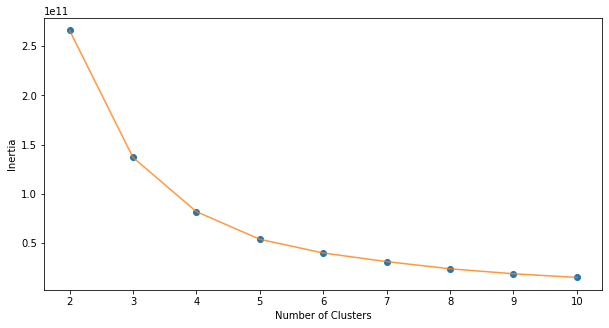

In [37]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(2,11), inertia, 'o')
plt.plot(np.arange(2,11), inertia, '-', alpha=0.8)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [38]:
from sklearn.metrics import silhouette_score

In [39]:
silhouette = []

for i in range(2,11):
    model = KMeans(n_clusters=i, random_state=35)
    model.fit(df_cluster)
    silhouette.append(silhouette_score(df_cluster, model.labels_))

silhouette

[0.6120591988493772,
 0.549900356485611,
 0.5343671375045697,
 0.5365907018509207,
 0.5221736775225535,
 0.5108076426651016,
 0.5160745640616368,
 0.5196064851968487,
 0.524734484569968]

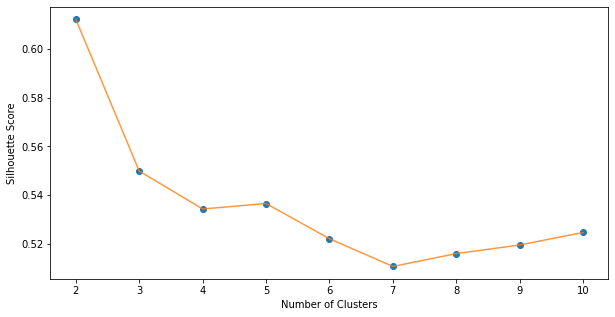

In [40]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(2,11), silhouette, 'o')
plt.plot(np.arange(2,11), silhouette, '-', alpha=0.8)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [41]:
model = KMeans(n_clusters=2)
model.fit(df_cluster)

KMeans(n_clusters=2)

In [42]:
df_cluster['label'] = model.labels_

In [43]:
df_cluster.head()

,Age,Income,Expenditure,Engagement,label
ID,,,,,
5524,64,58138,1617,1,0
2174,67,46344,27,0,1
4141,56,71613,776,0,0
6182,37,26646,53,0,1
5324,40,58293,422,0,0


In [44]:
df_cluster.groupby('label').mean()

,Age,Income,Expenditure,Engagement
label,,,,
0,54.299357,69532.796143,1069.879706,0.683196
1,50.021053,34429.014912,161.975439,0.224561


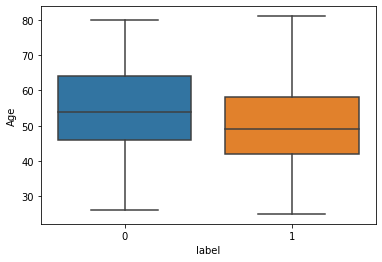

In [45]:
sns.boxplot(data=df_cluster, x='label', y='Age')
plt.show()

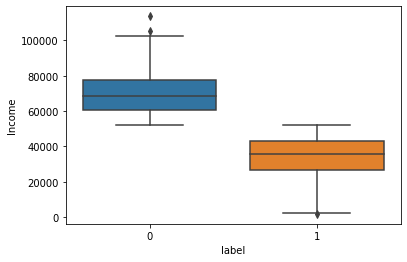

In [46]:
sns.boxplot(data=df_cluster, x='label', y='Income')
plt.show()

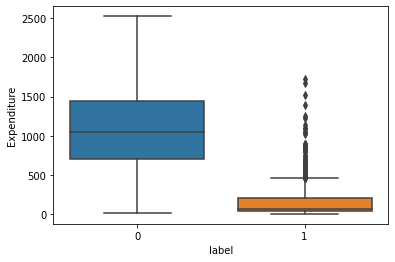

In [47]:
sns.boxplot(data=df_cluster, x='label', y='Expenditure')
plt.show()

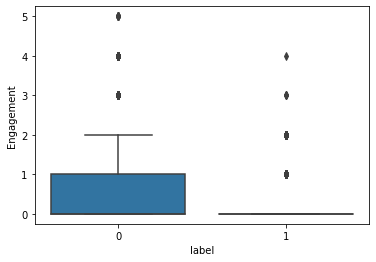

In [48]:
sns.boxplot(data=df_cluster, x='label', y='Engagement')
plt.show()